<a href="https://colab.research.google.com/github/Annaseanna/Simulacion-de-sistemas/blob/main/Practica4_Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4 - Simulación de Sistemas**
***Anna Ospina Bedoya***

Widgetco va a introducir un nuevo producto, el producto 3. Cada unidad de producto 3 se obtiene ensamblando una unidad de producto 1 y una unidad de producto 2. Antes de que se empiecen a producir los productos 1 y 2, hay que comprar materias primas y entrenar a los trabajadores. Antes de ensamblar los productos 1 y 2 en el producto 3, el producto terminado 2 debe ser inspeccionado. 

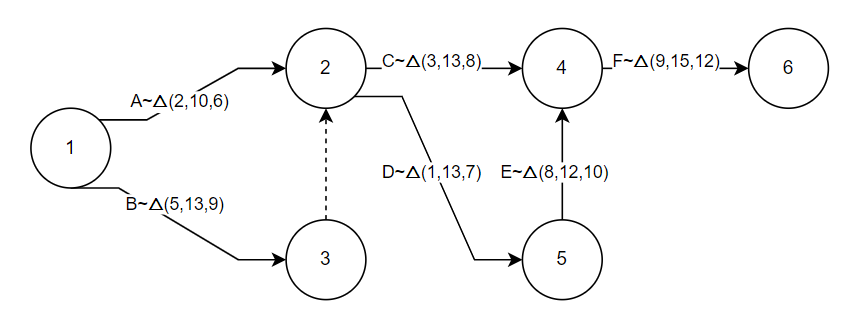

La duración de las actividades es incierta, y sigue una distribución triangular donde a es la estimación más optimista de la duración, b la menos optimista y  m la más probable. 

*   Crear un programa en Python o Excel que calcule el tiempo estimado para completar el proyecto. En el programa deben usarse las técnicas de transformada inversa vistas en clase.
*   Realizar 1000 simulaciones o más y determinar ¿Cuál es la probabilidad de terminar antes de 43 días?
*   ¿Son 1000 simulaciones suficientes para estimar la duración con un error de 2 días?










In [2]:
#Importamos la libreria para gnerar un número aleatorio 
import random
#Importamos la libreria math para hacer calculos estimados
import math 
#Numero de simulaciones 
N=1000
#Creamos la funcion de transformacion inversa que recibe los limites a y b y la probabilidad(c)
def transformarInv(a,b,c):
  #Generamos un nimero aleatorio entre 0 y 1
  r=random.random()
  #Aplicamos la funcion de la transformación inversa
  r1=(c-a)/(b-a)
  #print(r)
  if r <=r1:
    obs=a+math.sqrt(r*(b-a)*(c-a))
  else :
    obs=b-math.sqrt((1-r)*(b-a)*(b-c))
  return(obs)
#Declaramos una lista que guardara los tiempos segun las ramas
tiempo= []
for i in range(N):
  #Se aplica la funcion a cada uno de los nodos
  a_1=transformarInv(2,10,6)
  b_1=transformarInv(5,13,9)
  c_2=transformarInv(3,13,8)
  d_2=transformarInv(1,13,7)
  e_3=transformarInv(8,12,10)
  f_4=transformarInv(9,15,12)
  #Se agrega el elemento a la lista teniendo en cuenta los nodos con los que esta conectado
  tiempo.append(max(a_1,b_1)+max(c_2,d_2+e_3)+f_4)
#Se crea una lista que tenga los elementos de la lista tiempo que son menores a 43
x=[x for x in tiempo if x<43 ]
#Se obtiene el promedio sumando los elementos de la lista tiempo y dividiendolos en el numero de simulaciones
promedio=sum(tiempo)/N
#Se obtiene la probabilidad de terminar antes de 43 dias
probabilidad=len(x)/N
print(f'La probabilidad de terminar antes de 43 días es:{probabilidad}')
#Calculamos la desviacion para aplicarlo a en la formula de n
a=[math.pow((i-promedio),2) for i in tiempo]
desviacion=math.sqrt(sum(a)/N)
#Se calcula n
n=round(((math.pow(1.96,2)*(math.pow(desviacion,2)))/4),2)
print(f'El numero de interacciones necesarias es {n}')



La probabilidad de terminar antes de 43 días es:0.935
El numero de interacciones necesarias es 9.9
